# 卒業研究2：ロジスティック回帰，ニューラルネットワーク，畳み込みニューラルネットワーク比較
## 20S1066 坂西和也

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# データの読み込み
import os
# カレントディレクトリを取得
data_path = os.getcwd()

In [3]:
data_path

'/content'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(data_path + '/drive/MyDrive/卒研/EuF3_data.csv' , sep='\t')

In [5]:
data.head()

,Velocity (mm/s),EuF3_w0T7_8S5_85,EuF3_w1T7_8S5_85,EuF3_w2T7_8S5_85,EuF3_w3T7_8S5_85
0,-20.000000,373.275017,89.683715,59.446287,38.924525
1,-19.685039,373.239700,90.317998,59.679393,38.652381
2,-19.370079,373.287540,90.972404,59.770151,38.261999
3,-19.055118,373.344075,91.617714,59.701970,37.806983
4,-18.740157,373.326817,92.212957,59.470467,37.346615


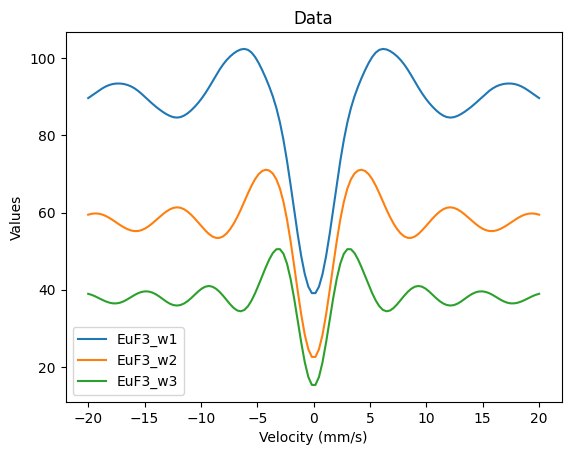

In [6]:
# 横軸に1列目のデータを使用
x = data.iloc[:, 0]

# 3列目から5列目のデータをそれぞれプロット
for i in range(2, 5):
    plt.plot(x, data.iloc[:, i], label=f'EuF3_w{i-1}')

# 凡例を追加
plt.legend()

# グラフのタイトルと軸ラベルを設定
plt.title('Data')
plt.xlabel('Velocity (mm/s)')
plt.ylabel('Values')

# グラフを表示
plt.show()

## データの圧縮c倍
データをc倍する．

ここでポイントになるのはデータを $c$倍に圧縮しても，ノイズの標準偏差は $c$倍にならないことである．

つまり$Y$を元データに乱数を乗せたデータ，$X$を元データとして$$ Y|X \sim N(X, X) $$と仮定する．

このとき$$\sigma = \sqrt{Var[Y|X]} = \sqrt{X}$$である．

ここで$X\to cX $としたとき$$\sqrt{Var[Y| cX]} = \sqrt{ cX} \simeq \sqrt c \sigma$$となる．

つまり，元データを c倍に圧縮すると，ノイズの標準偏差は約$\sqrt c$倍になり乱数の影響が大きくなってしまう．

実験でも実験時間が短くなると，元データのカウント数が小さくなるごとに，ノイズの影響が大きくなる．

# EuF3_w1

In [15]:
# 新しいDataFrame w1 を作成し、元の1列目をコピー
w1 = pd.DataFrame()
w1['Velocity (mm/s)'] = data.iloc[:, 0]

# 3列目のデータに指定された係数を順に掛け、新しい列として挿入
factors = [0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, \
           0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001]

for factor in factors:
    w1[f'EuF_w1 * {factor:.3f}'] = data.iloc[:, 2] * factor

# w1 の内容を表示（オプション）
w1.head()

,Velocity (mm/s),EuF_w1 * 0.100,EuF_w1 * 0.090,EuF_w1 * 0.080,EuF_w1 * 0.070,EuF_w1 * 0.060,EuF_w1 * 0.050,EuF_w1 * 0.040,EuF_w1 * 0.030,EuF_w1 * 0.020,EuF_w1 * 0.010,EuF_w1 * 0.009,EuF_w1 * 0.008,EuF_w1 * 0.007,EuF_w1 * 0.006,EuF_w1 * 0.005,EuF_w1 * 0.004,EuF_w1 * 0.003,EuF_w1 * 0.002,EuF_w1 * 0.001
0,-20.000000,8.968372,8.071534,7.174697,6.277860,5.381023,4.484186,3.587349,2.690511,1.793674,0.896837,0.807153,0.717470,0.627786,0.538102,0.448419,0.358735,0.269051,0.179367,0.089684
1,-19.685039,9.031800,8.128620,7.225440,6.322260,5.419080,4.515900,3.612720,2.709540,1.806360,0.903180,0.812862,0.722544,0.632226,0.541908,0.451590,0.361272,0.270954,0.180636,0.090318
2,-19.370079,9.097240,8.187516,7.277792,6.368068,5.458344,4.548620,3.638896,2.729172,1.819448,0.909724,0.818752,0.727779,0.636807,0.545834,0.454862,0.363890,0.272917,0.181945,0.090972
3,-19.055118,9.161771,8.245594,7.329417,6.413240,5.497063,4.580886,3.664709,2.748531,1.832354,0.916177,0.824559,0.732942,0.641324,0.549706,0.458089,0.366471,0.274853,0.183235,0.091618
4,-18.740157,9.221296,8.299166,7.377037,6.454907,5.532777,4.610648,3.688518,2.766389,1.844259,0.922130,0.829917,0.737704,0.645491,0.553278,0.461065,0.368852,0.276639,0.184426,0.092213


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [17]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LeakyReLU , Dropout , BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from sklearn.model_selection import KFold

import os
import random

In [18]:
# データ数の設定
number = 25
random_number = 25

# 0行目のデータを取得
row_at_zero_index = w1.iloc[0]

# カラムのリストを取得
columns_to_plot = w1.columns[1:].tolist()

# 教師信号を作成
y = [1]*number + [0]*random_number

Log1 = pd.DataFrame()
NN1 = pd.DataFrame()
CNN1 = pd.DataFrame()
# ニューラルネットワーク用のハイパーパラメータ範囲を設定
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'learning_rate_init': [0.001, 0.01, 0.1],
    # 他に最適化したいパラメータを追加
}


In [ ]:
%%time
# cuDNNの非決定的なアルゴリズムを使用しない設定
os.environ['TF_DETERMINISTIC_OPS'] = '1'
# 各カラムごとに
for column in columns_to_plot:
    dataset = pd.DataFrame()
    # 元データからノイズを付加したデータを作成
    for i in range(number):
        np.random.seed(i)
        column_name = f'noisy_{i}'
        # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
        variance = w1[column].values
        noise = np.random.normal(0, np.sqrt(variance))
        dataset[column_name] = w1[column] + noise

    # 乱数のみのデータを作成
    for i in range(random_number):
        j = i + number
        np.random.seed(j)
        column_name = f'random_{i}'
        # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
        noise = np.random.normal(row_at_zero_index[column], np.sqrt(row_at_zero_index[column]),\
                                  size=w1[column].shape)
        dataset[column_name] = noise

    # 入力データとして、各カラムを1つのサンプルとする
    X = dataset
    # データセットをトレーニングセットとテストセットに分割
    X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

    # ロジスティック回帰モデルを訓練
    clf = LogisticRegression(max_iter=10000)
    clf.fit(X_train, y_train)
    # テストデータを使って予測
    y_pred = clf.predict(X_test)
    # 評価
    Log1[column] = [clf.score(X_test, y_test)]

    # ニューラルネットワークのランダムサーチ
    mlp = MLPClassifier(max_iter=1000, random_state=111)
    random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, cv=5, random_state=111)
    random_search.fit(X_train, y_train)

    # 最適なパラメータでのモデルの評価
    best_mlp = random_search.best_estimator_
    y_pred = best_mlp.predict(X_test)
    NN1[column] = [accuracy_score(y_test, y_pred)]

    # 畳み込みニューラルネットワークの訓練
    # 乱数のシードを設定
    seed_value = 111
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    best_accuracy = 0
    best_params = {}
    # K分割交差検証
    kfold = KFold(n_splits=3, shuffle=True, random_state=111)

    # 入力データとラベルを作成
    X = dataset.T.values  # 転置を取ることで、次元が128、サンプル数が50になる
    X = X[:, :, None]  # 1D-CNNに適用するために、3次元の形状に変形
    y = np.array(y)

    # 訓練データとテストデータに分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

    # 訓練データを用いてStandardScalerを学習
    scaler = StandardScaler()
    X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
    X_train_reshaped = scaler.fit_transform(X_train_reshaped)
    X_train = X_train_reshaped.reshape(X_train.shape)

    # テストデータにも同じ正規化を適用
    X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])
    X_test_reshaped = scaler.transform(X_test_reshaped)  # 注意: fit_transformではなく、transformを使う
    X_test = X_test_reshaped.reshape(X_test.shape)

    # 1D-CNNモデルの構築
    model = Sequential()
    reg_strength = 0.020  # 正則化の強度を設定（この値は調整が必要）
    # 第一畳み込み層（フィルタ数を増やし、バッチ正規化とドロップアウトを追加）
    model.add(Conv1D(filters=64, kernel_size=3, input_shape=(128, 1), kernel_regularizer=l2(reg_strength)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))

    # 追加の畳み込み層
    model.add(Conv1D(filters=128, kernel_size=5, kernel_regularizer=l2(reg_strength)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))

    # 平滑化と全結合層
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(reg_strength)))
    model.add(Dropout(0.5))

    # 出力層
    model.add(Dense(1, activation='sigmoid'))

    # モデルのコンパイル
    optimizer = Adam(learning_rate=0.0021)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # モデルの訓練
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # テストデータでの評価
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    CNN1[column] = [accuracy]

CPU times: user 6min 16s, sys: 1min 12s, total: 7min 28s
Wall time: 7min 27s


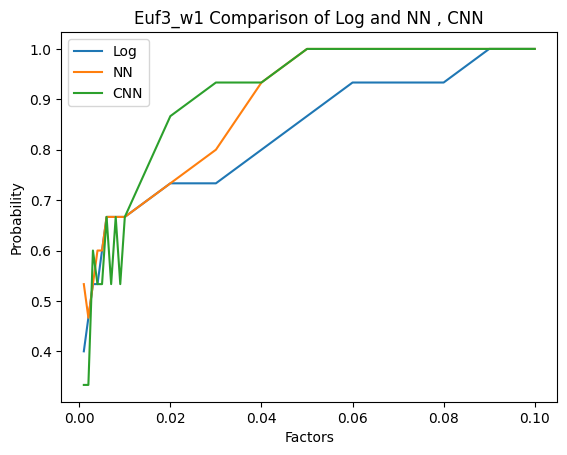

In [ ]:
# factors リストを DataFrame に変換
factors_df = pd.DataFrame({'Factors': factors})
# インデックスをリセット
factors_df.reset_index(drop=True, inplace=True)
Log1_reset = Log1.T.reset_index(drop=True)
NN1_reset = NN1.T.reset_index(drop=True)
CNN1_reset = CNN1.T.reset_index(drop=True)

# インデックスをリセットしたDataFrameを結合
result_df = pd.concat([factors_df, Log1_reset, NN1_reset , CNN1_reset], axis=1)

result_df = pd.concat([factors_df, Log1_reset, NN1_reset , CNN1_reset], axis=1)
result_df.columns = ['Factors', 'Log', 'NN' , 'CNN']

# Factors を横軸に設定
x = result_df['Factors']

# Log と NN を重ねてプロット
plt.plot(x, result_df['Log'], label='Log')
plt.plot(x, result_df['NN'], label='NN')
plt.plot(x, result_df['CNN'], label='CNN')

# 凡例を追加
plt.legend()

# グラフのタイトルと軸ラベルを設定
plt.title('Euf3_w1 Comparison of Log and NN , CNN')
plt.xlabel('Factors')
plt.ylabel('Probability')

# グラフを表示
plt.show()

# EuF_w2

In [ ]:
# 新しいDataFrame w1 を作成し、元の1列目をコピー
w2 = pd.DataFrame()
w2['Velocity (mm/s)'] = data.iloc[:, 0]

for factor in factors:
    w2[f'EuF_w2 * {factor:.3f}'] = data.iloc[:, 3] * factor

# w2 の内容を表示（オプション）
w2.head()

,Velocity (mm/s),EuF_w2 * 0.100,EuF_w2 * 0.090,EuF_w2 * 0.080,EuF_w2 * 0.070,EuF_w2 * 0.060,EuF_w2 * 0.050,EuF_w2 * 0.040,EuF_w2 * 0.030,EuF_w2 * 0.020,EuF_w2 * 0.010,EuF_w2 * 0.009,EuF_w2 * 0.008,EuF_w2 * 0.007,EuF_w2 * 0.006,EuF_w2 * 0.005,EuF_w2 * 0.004,EuF_w2 * 0.003,EuF_w2 * 0.002,EuF_w2 * 0.001
0,-20.000000,5.944629,5.350166,4.755703,4.161240,3.566777,2.972314,2.377851,1.783389,1.188926,0.594463,0.535017,0.475570,0.416124,0.356678,0.297231,0.237785,0.178339,0.118893,0.059446
1,-19.685039,5.967939,5.371145,4.774351,4.177558,3.580764,2.983970,2.387176,1.790382,1.193588,0.596794,0.537115,0.477435,0.417756,0.358076,0.298397,0.238718,0.179038,0.119359,0.059679
2,-19.370079,5.977015,5.379314,4.781612,4.183911,3.586209,2.988508,2.390806,1.793105,1.195403,0.597702,0.537931,0.478161,0.418391,0.358621,0.298851,0.239081,0.179310,0.119540,0.059770
3,-19.055118,5.970197,5.373177,4.776158,4.179138,3.582118,2.985099,2.388079,1.791059,1.194039,0.597020,0.537318,0.477616,0.417914,0.358212,0.298510,0.238808,0.179106,0.119404,0.059702
4,-18.740157,5.947047,5.352342,4.757637,4.162933,3.568228,2.973523,2.378819,1.784114,1.189409,0.594705,0.535234,0.475764,0.416293,0.356823,0.297352,0.237882,0.178411,0.118941,0.059470


In [ ]:
# 0行目のデータを取得
row_at_zero_index = w2.iloc[0]

# カラムのリストを取得
columns_to_plot = w2.columns[1:].tolist()

Log2 = pd.DataFrame()
NN2 = pd.DataFrame()
CNN2 = pd.DataFrame()

In [ ]:
%%time
# cuDNNの非決定的なアルゴリズムを使用しない設定
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# 各カラムごとに
for column in columns_to_plot:
    dataset = pd.DataFrame()
    # 元データからノイズを付加したデータを作成
    for i in range(number):
        np.random.seed(i)
        column_name = f'noisy_{i}'
        # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
        variance = w2[column].values
        noise = np.random.normal(0, np.sqrt(variance))
        dataset[column_name] = w2[column] + noise

    # 乱数のみのデータを作成
    for i in range(random_number):
        j = i + number
        np.random.seed(j)
        column_name = f'random_{i}'
        # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
        noise = np.random.normal(row_at_zero_index[column], np.sqrt(row_at_zero_index[column]),\
                                  size=w2[column].shape)
        dataset[column_name] = noise

    # 入力データとして、各カラムを1つのサンプルとする
    X = dataset
    # データセットをトレーニングセットとテストセットに分割
    X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

    # ロジスティック回帰モデルを訓練
    clf = LogisticRegression(max_iter=10000)
    clf.fit(X_train, y_train)
    # テストデータを使って予測
    y_pred = clf.predict(X_test)
    # 評価
    Log2[column] = [clf.score(X_test, y_test)]

    # ニューラルネットワークのランダムサーチ
    mlp = MLPClassifier(max_iter=1000, random_state=111)
    random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, cv=5, random_state=111)
    random_search.fit(X_train, y_train)

    # 最適なパラメータでのモデルの評価
    best_mlp = random_search.best_estimator_
    y_pred = best_mlp.predict(X_test)
    NN2[column] = [accuracy_score(y_test, y_pred)]

    # 畳み込みニューラルネットワークの訓練
    # 乱数のシードを設定
    seed_value = 111
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    best_accuracy = 0
    best_params = {}

    # K分割交差検証
    kfold = KFold(n_splits=3, shuffle=True, random_state=111)

    # 入力データとラベルを作成
    X = dataset.T.values  # 転置を取ることで、次元が128、サンプル数が50になる
    X = X[:, :, None]  # 1D-CNNに適用するために、3次元の形状に変形
    y = np.array(y)
   # 他の部分は変更せずに、CNNの部分だけを更新
    # 訓練データとテストデータに分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

    # 訓練データを用いてStandardScalerを学習
    scaler = StandardScaler()
    X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
    X_train_reshaped = scaler.fit_transform(X_train_reshaped)
    X_train = X_train_reshaped.reshape(X_train.shape)

    # テストデータにも同じ正規化を適用
    X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])
    X_test_reshaped = scaler.transform(X_test_reshaped)  # 注意: fit_transformではなく、transformを使う
    X_test = X_test_reshaped.reshape(X_test.shape)

    # 1D-CNNモデルの構築
    model = Sequential()
    reg_strength = 0.042  # 正則化の強度を設定（この値は調整が必要）
    # 第一畳み込み層（フィルタ数を増やし、バッチ正規化とドロップアウトを追加）
    model.add(Conv1D(filters=64, kernel_size=3, input_shape=(128, 1), kernel_regularizer=l2(reg_strength)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))

    # 追加の畳み込み層
    model.add(Conv1D(filters=128, kernel_size=5, kernel_regularizer=l2(reg_strength)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))

    # 平滑化と全結合層
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(reg_strength)))
    model.add(Dropout(0.5))

    # 出力層
    model.add(Dense(1, activation='sigmoid'))

    # モデルのコンパイル
    optimizer = Adam(learning_rate=0.002)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # モデルの訓練
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # テストデータでの評価
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    CNN2[column] = [accuracy]

CPU times: user 6min 15s, sys: 1min 17s, total: 7min 33s
Wall time: 7min 9s


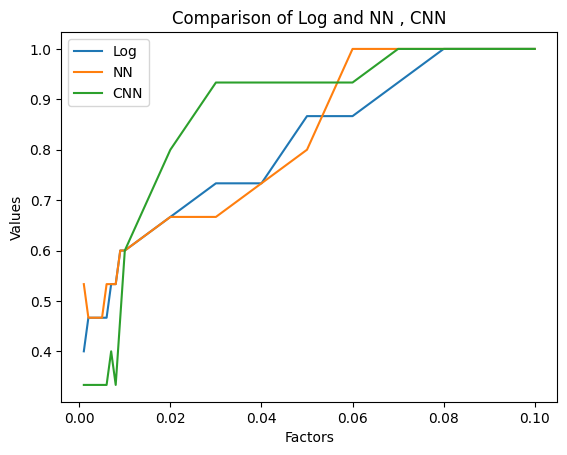

In [ ]:
# factors リストを DataFrame に変換
factors_df = pd.DataFrame({'Factors': factors})
# インデックスをリセット
factors_df.reset_index(drop=True, inplace=True)
Log2_reset = Log2.T.reset_index(drop=True)
NN2_reset = NN2.T.reset_index(drop=True)
CNN2_reset = CNN2.T.reset_index(drop=True)

# インデックスをリセットしたDataFrameを結合
result_df = pd.concat([factors_df, Log2_reset, NN2_reset , CNN2_reset], axis=1)

result_df = pd.concat([factors_df, Log2_reset, NN2_reset , CNN2_reset], axis=1)
result_df.columns = ['Factors', 'Log', 'NN' , 'CNN']

# Factors を横軸に設定
x = result_df['Factors']

# Log と NN を重ねてプロット
plt.plot(x, result_df['Log'], label='Log')
plt.plot(x, result_df['NN'], label='NN')
plt.plot(x, result_df['CNN'], label='CNN')

# 凡例を追加
plt.legend()

# グラフのタイトルと軸ラベルを設定
plt.title('EuF3_w2 Comparison of Log and NN , CNN')
plt.xlabel('Factors')
plt.ylabel('Probability')

# グラフを表示
plt.show()

# EuF_w3

In [21]:
# 新しいDataFrame w1 を作成し、元の1列目をコピー
w3 = pd.DataFrame()
w3['Velocity (mm/s)'] = data.iloc[:, 0]

# 3列目のデータに指定された係数を順に掛け、新しい列として挿入
factors = [0.15,0.14,0.13,0.12,0.11,\
           0.10, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, \
           0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001]

for factor in factors:
    w3[f'EuF_w3 * {factor:.3f}'] = data.iloc[:, 4] * factor

# w3 の内容を表示（オプション）
w3.head()

,Velocity (mm/s),EuF_w3 * 0.150,EuF_w3 * 0.140,EuF_w3 * 0.130,EuF_w3 * 0.120,EuF_w3 * 0.110,EuF_w3 * 0.100,EuF_w3 * 0.090,EuF_w3 * 0.080,EuF_w3 * 0.070,...,EuF_w3 * 0.010,EuF_w3 * 0.009,EuF_w3 * 0.008,EuF_w3 * 0.007,EuF_w3 * 0.006,EuF_w3 * 0.005,EuF_w3 * 0.004,EuF_w3 * 0.003,EuF_w3 * 0.002,EuF_w3 * 0.001
0,-20.000000,5.838679,5.449433,5.060188,4.670943,4.281698,3.892452,3.503207,3.113962,2.724717,...,0.389245,0.350321,0.311396,0.272472,0.233547,0.194623,0.155698,0.116774,0.077849,0.038925
1,-19.685039,5.797857,5.411333,5.024810,4.638286,4.251762,3.865238,3.478714,3.092191,2.705667,...,0.386524,0.347871,0.309219,0.270567,0.231914,0.193262,0.154610,0.115957,0.077305,0.038652
2,-19.370079,5.739300,5.356680,4.974060,4.591440,4.208820,3.826200,3.443580,3.060960,2.678340,...,0.382620,0.344358,0.306096,0.267834,0.229572,0.191310,0.153048,0.114786,0.076524,0.038262
3,-19.055118,5.671047,5.292978,4.914908,4.536838,4.158768,3.780698,3.402628,3.024559,2.646489,...,0.378070,0.340263,0.302456,0.264649,0.226842,0.189035,0.151228,0.113421,0.075614,0.037807
4,-18.740157,5.601992,5.228526,4.855060,4.481594,4.108128,3.734662,3.361195,2.987729,2.614263,...,0.373466,0.336120,0.298773,0.261426,0.224080,0.186733,0.149386,0.112040,0.074693,0.037347


In [22]:
# データ数の設定
number = 25
random_number = 25

# 0行目のデータを取得
row_at_zero_index = w3.iloc[0]

# カラムのリストを取得
columns_to_plot = w3.columns[1:].tolist()

Log3 = pd.DataFrame()
NN3 = pd.DataFrame()
CNN3 = pd.DataFrame()

In [33]:
%%time
# cuDNNの非決定的なアルゴリズムを使用しない設定
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# 各カラムごとに
for column in columns_to_plot:
    dataset = pd.DataFrame()
    # 元データからノイズを付加したデータを作成
    for i in range(number):
        np.random.seed(i)
        column_name = f'noisy_{i}'
        # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
        variance = w3[column].values
        noise = np.random.normal(0, np.sqrt(variance))
        dataset[column_name] = w3[column] + noise

    # 乱数のみのデータを作成
    for i in range(random_number):
        j = i + number
        np.random.seed(j)
        column_name = f'random_{i}'
        # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
        noise = np.random.normal(row_at_zero_index[column], np.sqrt(row_at_zero_index[column]),\
                                  size=w3[column].shape)
        dataset[column_name] = noise

    # 入力データとして、各カラムを1つのサンプルとする
    X = dataset
    # データセットをトレーニングセットとテストセットに分割
    X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

    # ロジスティック回帰モデルを訓練
    clf = LogisticRegression(max_iter=10000)
    clf.fit(X_train, y_train)
    # テストデータを使って予測
    y_pred = clf.predict(X_test)
    # 評価
    Log3[column] = [clf.score(X_test, y_test)]

    # ニューラルネットワークのランダムサーチ
    mlp = MLPClassifier(max_iter=1000, random_state=111)
    random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, cv=5, random_state=111)
    random_search.fit(X_train, y_train)

    # 最適なパラメータでのモデルの評価
    best_mlp = random_search.best_estimator_
    y_pred = best_mlp.predict(X_test)
    NN3[column] = [accuracy_score(y_test, y_pred)]

    # 畳み込みニューラルネットワークの訓練
    # 乱数のシードを設定
    seed_value = 111
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    best_accuracy = 0
    best_params = {}

    # K分割交差検証
    kfold = KFold(n_splits=3, shuffle=True, random_state=111)

    # 入力データとラベルを作成
    X = dataset.T.values  # 転置を取ることで、次元が128、サンプル数が50になる
    X = X[:, :, None]  # 1D-CNNに適用するために、3次元の形状に変形
    y = np.array(y)

    # 訓練データとテストデータに分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

    # 訓練データを用いてStandardScalerを学習
    scaler = StandardScaler()
    X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
    X_train_reshaped = scaler.fit_transform(X_train_reshaped)
    X_train = X_train_reshaped.reshape(X_train.shape)

    # テストデータにも同じ正規化を適用
    X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])
    X_test_reshaped = scaler.transform(X_test_reshaped)  # 注意: fit_transformではなく、transformを使う
    X_test = X_test_reshaped.reshape(X_test.shape)

    # 1D-CNNモデルの構築
    model = Sequential()
    reg_strength = 0.067  # 正則化の強度を設定（この値は調整が必要）
    # 第一畳み込み層（フィルタ数を増やし、バッチ正規化とドロップアウトを追加）
    model.add(Conv1D(filters=64, kernel_size=3, input_shape=(128, 1), kernel_regularizer=l2(reg_strength)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))

    # 追加の畳み込み層
    model.add(Conv1D(filters=128, kernel_size=5, kernel_regularizer=l2(reg_strength)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))

    # 平滑化と全結合層
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(reg_strength)))
    model.add(Dropout(0.5))

    # 出力層
    model.add(Dense(1, activation='sigmoid'))

    # モデルのコンパイル
    optimizer = Adam(learning_rate=0.002)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # モデルの訓練
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # テストデータでの評価
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    CNN3[column] = [accuracy]


CPU times: user 7min 31s, sys: 1min 37s, total: 9min 8s
Wall time: 8min 40s


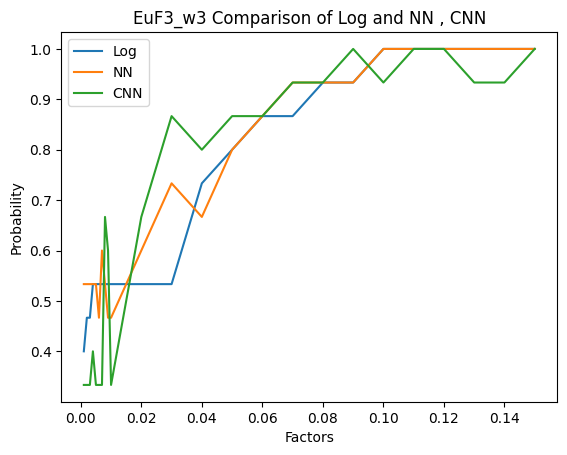

In [34]:
# factors リストを DataFrame に変換
factors_df = pd.DataFrame({'Factors': factors})
# インデックスをリセット
factors_df.reset_index(drop=True, inplace=True)
Log3_reset = Log3.T.reset_index(drop=True)
NN3_reset = NN3.T.reset_index(drop=True)
CNN3_reset = CNN3.T.reset_index(drop=True)

# インデックスをリセットしたDataFrameを結合
result_df = pd.concat([factors_df, Log3_reset, NN3_reset , CNN3_reset], axis=1)

result_df = pd.concat([factors_df, Log3_reset, NN3_reset , CNN3_reset], axis=1)
result_df.columns = ['Factors', 'Log', 'NN' , 'CNN']

# Factors を横軸に設定
x = result_df['Factors']

# Log と NN を重ねてプロット
plt.plot(x, result_df['Log'], label='Log')
plt.plot(x, result_df['NN'], label='NN')
plt.plot(x, result_df['CNN'], label='CNN')

# 凡例を追加
plt.legend()

# グラフのタイトルと軸ラベルを設定
plt.title('EuF3_w3 Comparison of Log and NN , CNN')
plt.xlabel('Factors')
plt.ylabel('Probability')

# グラフを表示
plt.show()